# Heathcare Insurance Charges Individual Formative Project

In [1]:
import pandas as pd #import panda library
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Individual Formative Project/insurance raw data.csv')

df.head() #shows first 5 rows of raw data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Cleaning data - check to see if there are missing values or duplicates

In [2]:
df.info() #get information of the csv file and the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.isnull().sum() #checking for missing data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### The isnull function showed that there are no missing values

#### Check for duplicate values

In [4]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


##### The above shows that there are duplicate data in rows 195 and 581

#### Removing duplicate row and checking that duplicate as been removed

In [6]:
df.drop_duplicates(inplace=True) # code to drop any duplicates

check to make sure that the columns have not changed

In [7]:
print(df.shape)

(1337, 7)


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.to_csv("insurance clean data.csv") #exporting dataframe to csv file to check that the duplicate has been removed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
df.describe().T #statistic summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


#### Create a scatter plot graph to show the relationship between insurance charges and bmi - Identify a positive, negative or no correlation

In [13]:
bmi_cost = df[["charges", "bmi"]] #selecting specific columns 
bmi_cost.head(1337)

,charges,bmi
0,16884.92400,27.900
1,1725.55230,33.770
2,4449.46200,33.000
3,21984.47061,22.705
4,3866.85520,28.880
...,...,...
1333,10600.54830,30.970
1334,2205.98080,31.920
1335,1629.83350,36.850
1336,2007.94500,25.800


Text(0.5, 0, 'Healthcare Insurance Charges')

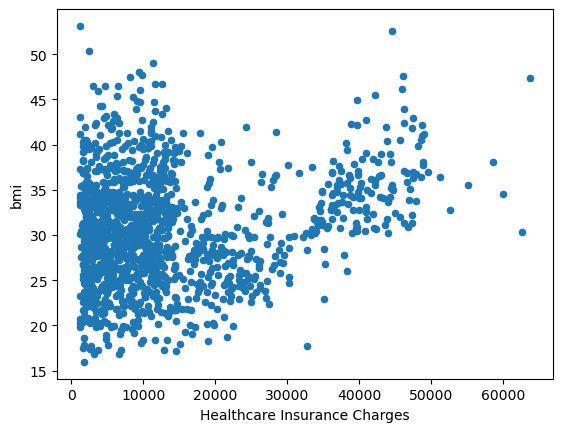

In [17]:
# Source - https://stackoverflow.com/q
# Posted by Tweep
# Retrieved 2025-11-14, License - CC BY-SA 4.0

df.plot.scatter(x='charges', y='bmi')

plt.xlabel('Healthcare Insurance Charges')

Text(0.5, 0, 'Healthcare Insurance Charges')

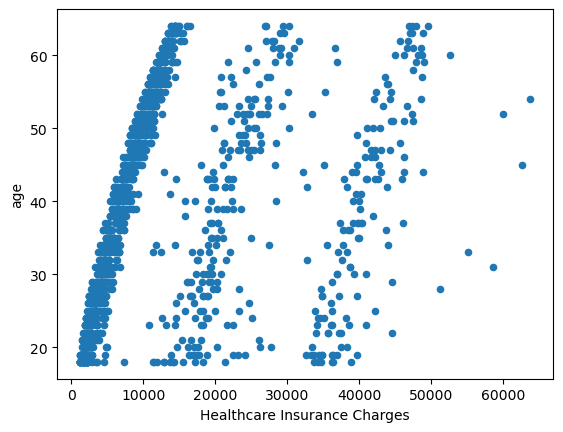

In [46]:
df.plot.scatter(x='charges', y='age')
plt.xlabel('Healthcare Insurance Charges')

Text(0.5, 0, 'Healthcare Insurance Charges')

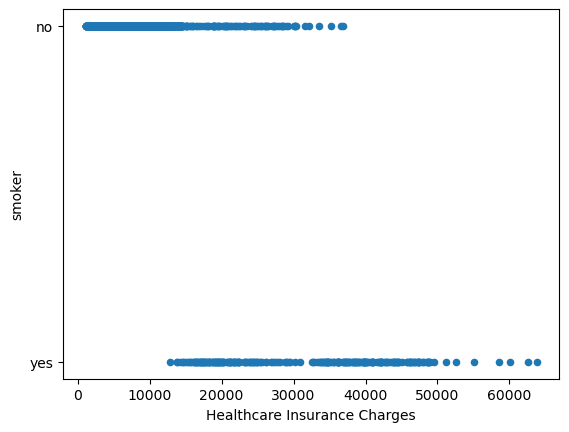

In [22]:
df.plot.scatter(x='charges', y='age')

plt.xlabel('Healthcare Insurance Charges')

##### The above scatter plot shows that smokers tend have a higher charge than non-smokers

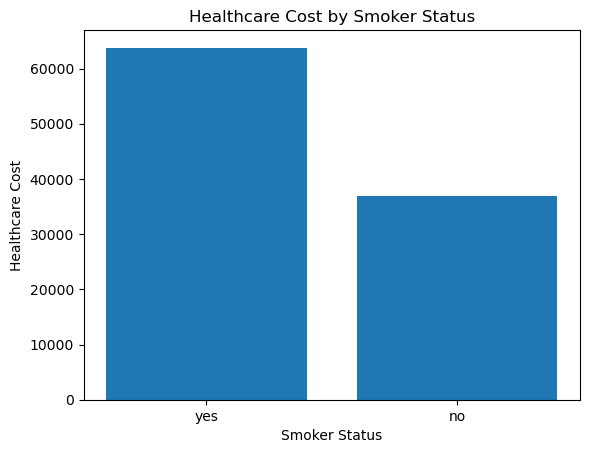

In [35]:
#accessing subset columns from the dataframe
x = df["smoker"] #this code was corrected with anaconda AI. I originally had x = df(["smoker"])
y = df["charges"]
#relationship between healthcare cost with non-smokers and smokers
plt.bar(x, y)
plt.xlabel('Smoker Status')
plt.ylabel('Healthcare Cost')
plt.title('Healthcare Cost by Smoker Status')
plt.savefig("cost_vs_smoker.png")
plt.show()

##### Showing the above as a bar chart instead of scatter plot speaks volumes and easy to see that if you are a smoker you will have higher insurance charges

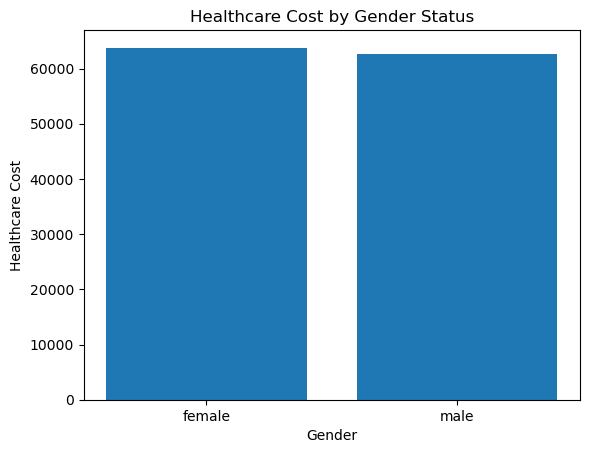

In [30]:
x = df["sex"]
y = df["charges"]

plt.bar(x, y)
plt.xlabel('Gender')
plt.ylabel('Healthcare Cost')
plt.title('Healthcare Cost by Gender Status')
plt.show()

##### From the above bar chart we can see there isn't much difference in insurance cost between male and females.

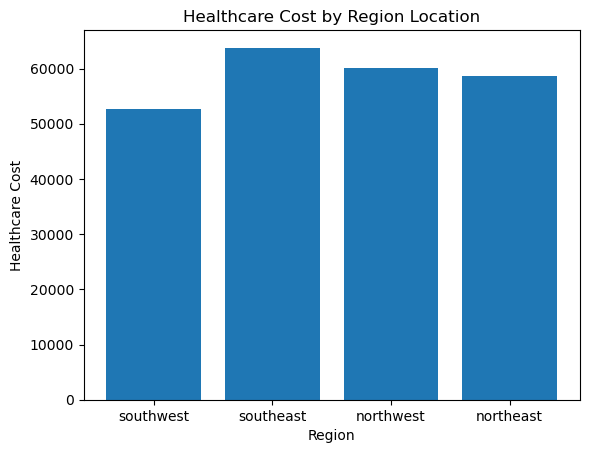

In [36]:
x = df["region"]
y = df["charges"]

plt.bar(x, y)
plt.xlabel('Region')
plt.ylabel('Healthcare Cost')
plt.title('Healthcare Cost by Region Location')
plt.savefig("cost_vs_region.png")
plt.show()

##### This is interesting there seems to be a dip in charges for those living in the southwest region compared with the other 3 regional locations

In [43]:
#average of charges against each age of individuals
#df.groupby(["charges", "age"]).mean()
df.groupby("age")["charges"].mean()
#df.groupby('Category')['Value'].mean() - this was found on stackflow

age
18     7086.217556
19     9868.929428
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64